In [6]:
import sys
sys.path.append('../')

In [7]:
import tensorflow as tf

(train_images, train_labels), (test_images,
                               test_labels) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.astype(
    'float32') / 255.0, test_images.astype('float32') / 255.0

In [8]:
import pickle

model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3),
          activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8,  activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# epochs = 100
# batch_size = 256
# history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, callbacks=tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=5, verbose=2), validation_data=(test_images, test_labels))

# model.save('model.keras')
# model.save_weights('weights.keras')

with open('history.pkl', 'rb') as file:
    history = pickle.load(file)


model.load_weights('weights.keras')
loss, accuracy = model.evaluate(test_images, test_labels)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 2s 4ms/step - loss: 1.1202 - accuracy: 0.6220
Test Loss: 1.120187759399414
Test Accuracy: 0.621999979019165


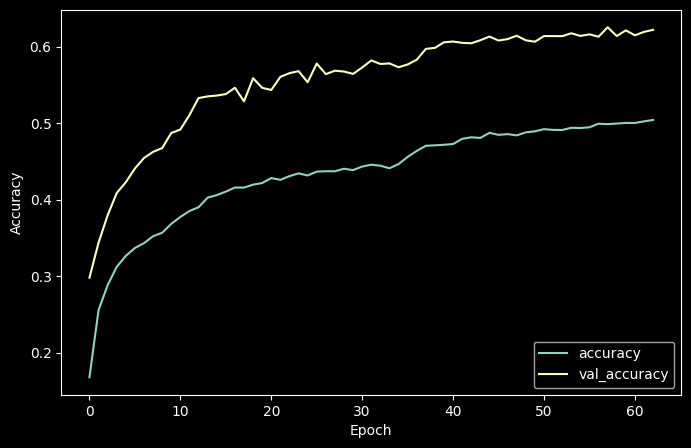

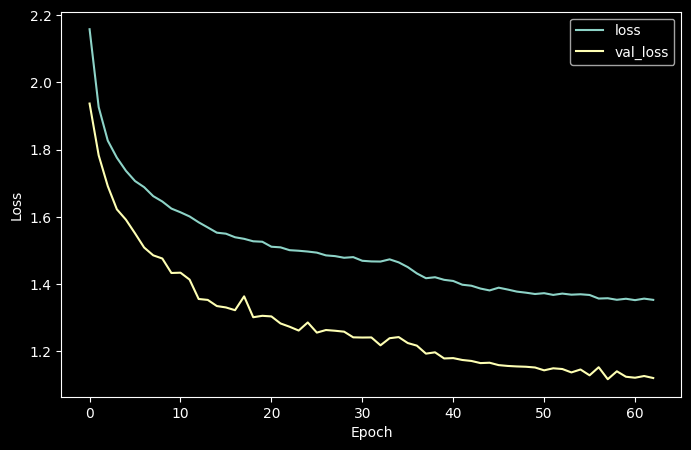

313/313 - 1s - 1s/epoch - 4ms/step


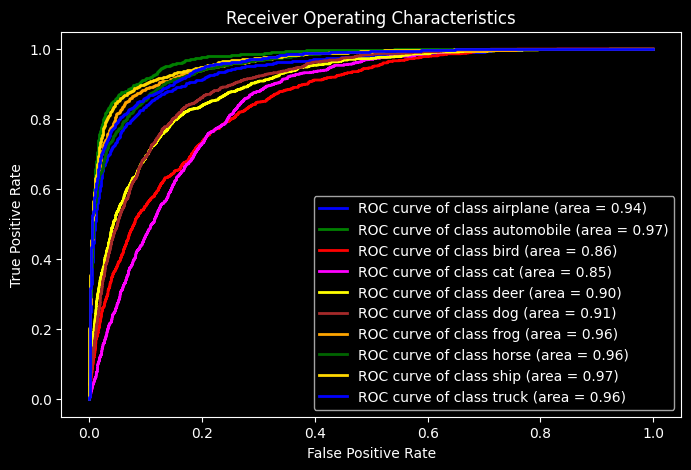

0.5800000000000001
              precision    recall  f1-score   support

    airplane       0.77      0.61      0.68      1000
  automobile       0.82      0.76      0.78      1000
        bird       0.43      0.33      0.38      1000
         cat       0.41      0.21      0.28      1000
        deer       0.48      0.63      0.54      1000
         dog       0.51      0.55      0.53      1000
        frog       0.68      0.79      0.73      1000
       horse       0.59      0.78      0.67      1000
        ship       0.76      0.80      0.78      1000
       truck       0.69      0.76      0.73      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.62      0.61     10000



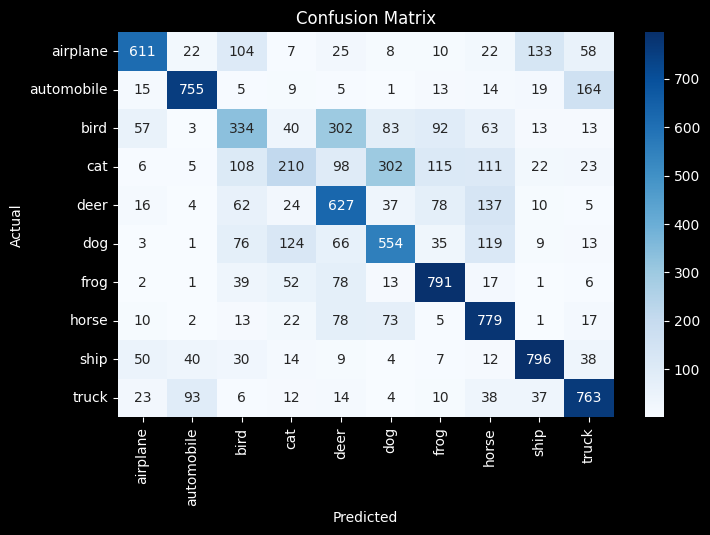

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
import numpy as np

from plotting import roc_plot, plot_history, cm_plot

plot_history(history)

y_prob = model.predict(test_images, verbose=2)
y_pred = np.argmax(y_prob, axis=1)

roc_plot(test_labels, y_prob, class_names)
print(cohen_kappa_score(test_labels.squeeze(), y_pred))
print(classification_report(test_labels, y_pred, target_names=class_names))
cm_plot(confusion_matrix(test_labels, y_pred), class_names)